In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions.util import SEED, save_results

plt.style.use('seaborn')

re_lim=(-2,1) 
im_lim=(-1.25,1.25)

theta = 1.506793

save_files = False
run_full = False

# Computing distribution for 3  sampling methods
- same sample size, iterations and simulations 

In [ ]:
from functions.sampling_functions import generate_pureRandomSample, generate_latinHyperCube, generate_Orthogonal
from functions.simulation_functions import test_sampling_function_nsims, get_confidence_interval

test_functions = [generate_pureRandomSample,generate_latinHyperCube, generate_Orthogonal]

n_samples = 15000
n_simulations = 1000
n_iterations = 1500

results = [] 
results_data = []

for sampling_function in test_functions:
    result, data = test_sampling_function_nsims(sampling_function,
                                            n_simulations=n_simulations,
                                            n_iterations=n_iterations,
                                            n_points=n_samples)
    results.append(result)
    results_data.append(data)
    result.explain()


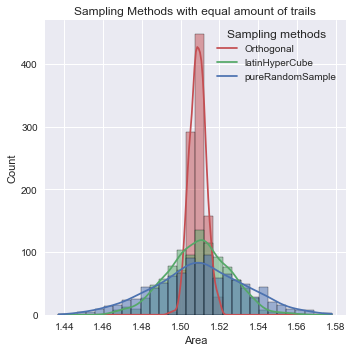

In [19]:
import seaborn as sns

df = pd.DataFrame(np.transpose(results_data), columns=[str(r.funct).removeprefix("generate_") for r in results],)
fig = sns.displot(df,bins=30 ,kde=True, legend=False, )
labels = [str(r.funct).removeprefix("generate_") for r in results]
labels.reverse()

plt.legend(labels=labels,loc=1, title="Sampling methods", 
           fontsize = 'medium', title_fontsize = "12")
plt.title("Sampling Methods with equal amount of trails")
plt.xlabel("Area")
plt.tight_layout()

# plt.savefig(f"figures/dist_comp_of_sampling_nsims={n_simulations}", dpi=600)


# calculating the confidence interval for different sampling functions

In [ ]:
from functions.sampling_functions import generate_pureRandomSample, generate_latinHyperCube, generate_Orthogonal
from functions.simulation_functions import test_sampling_function_max_a
test_functions = [generate_pureRandomSample,generate_latinHyperCube, generate_Orthogonal]

samplestep = 100
max_a = 0.005 * theta
n_iterations = 1000
n_points = 144
results =[]
results_data = []

np.random.seed(SEED) 
for sampling_function in test_functions:
    result, data = test_sampling_function_max_a(sampling_function, 
                                    samplestep=samplestep,
                                    max_a=max_a,
                                    n_iterations=n_iterations,
                                    n_points=n_points, 
                                    )
    results.append(result)
    results_data.append(data)
    result.explain()

/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


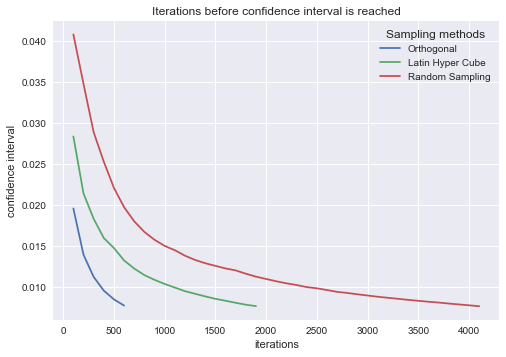

In [26]:
# plotting the confidence interval with respect to the number of itterations
std_data = []
std_xaxis = []
for data in results_data:
    std_i = []
    xaxis_i = []
    data = np.array(data).flatten()
    
    for i in range(int(len(data)/samplestep)):
        xaxis_i.append(i*samplestep)
        std_i.append(get_confidence_interval(1.96, np.std(data[:i*samplestep]), i*samplestep))
    
    std_xaxis.append(xaxis_i)
    std_data.append(std_i)

for i in range(len(std_data)):
    plt.plot(std_xaxis[i], std_data[i])

plt.ylabel("confidence interval")
plt.xlabel("iterations")
plt.legend(labels=["Orthogonal", "Latin Hyper Cube","Random Sampling"],loc=1, title="Sampling methods", 
           fontsize = 'medium', title_fontsize = "12")
plt.title("Iterations before confidence interval is reached")
# plt.savefig("figures/speed_comparison_confidence_interval.png", dpi=600)

## Testing SOBOL
SOBOL is quasi monte-carlo methods. 

for SOBON we need to input the number of samples to be equal to $2^n$ for $n=1,2,....$ 

In [46]:
from functions.sampling_functions import generate_Orthogonal, generate_sobol
from functions.simulation_functions import test_sampling_function_nsims, get_confidence_interval

test_functions = [generate_Orthogonal, generate_sobol]

n_simulations = 1000
n_iterations = 1500
n_samples = 2**13

results = [] 
results_data = []

np.random.seed(SEED)
for sampling_function in test_functions:
    result, data = test_sampling_function_nsims(sampling_function,
                                              n_simulations=n_simulations,
                                              n_iterations=n_iterations,
                                              n_points=n_samples)
    results.append(result)
    results_data.append(data)
    result.explain()

Running simulation for generate_Orthogonal:


100%|██████████| 1000/1000 [04:26<00:00,  3.76it/s]


Result of simulation for generate_Orthogonal: 
                 n_sims 	| 	 1000 
                    mean 	| 	 1.5094 
                    std 	| 	 0.006375 
                    comp. time	| 	 265 s 
                    conf. int.	| 	 0.000395 
                    conf % 	| 	 95.0 
                  
Running simulation for generate_sobol:


100%|██████████| 1000/1000 [03:03<00:00,  5.46it/s]

Result of simulation for generate_sobol: 
                 n_sims 	| 	 1000 
                    mean 	| 	 1.5093 
                    std 	| 	 0.006021 
                    comp. time	| 	 182 s 
                    conf. int.	| 	 0.000373 
                    conf % 	| 	 95.0 
                  


In [48]:
save_results(results,filename=f"orth-sobol-stat-comparison-nsim{n_simulations}-it{n_iterations}-sampl{n_samples}")

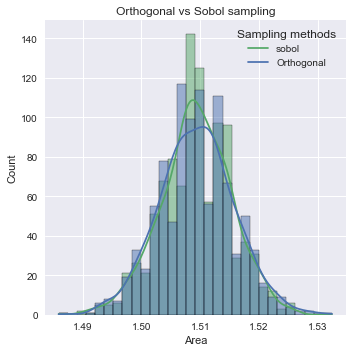

In [49]:
import seaborn as sns

df = pd.DataFrame(np.transpose(results_data), columns=[str(r.funct).removeprefix("generate_") for r in results],)
fig = sns.displot(df,bins=30 ,kde=True, legend=False, )
# fig.set_axis_labels(x_var="area")
labels = [str(r.funct).removeprefix("generate_") for r in results]
labels.reverse()
plt.legend(labels=labels,loc=1, title="Sampling methods", 
           fontsize = 'medium', title_fontsize = "12")
plt.title("Orthogonal vs Sobol sampling")
plt.xlabel("Area")
plt.tight_layout()

# plt.savefig(f"figures/dist_comp_orth-sobol_nsims={n_simulations}-ss={n_samples}-it{n_iterations}", dpi=600)